# Normalized Cut

## Reading dataset

In [1]:
from assignment_3.clustering.io import read_small_dataset
from assignment_3.clustering.model import NormalizedCutEvaluation, DataClusterSplit

In [2]:
data = read_small_dataset().reduce_to_percentage(0.1)
data

2023-02-26 17:49:42.583 | INFO     | assignment_3.clustering.io:read_small_dataset:50 - Reading datasets


[Features: 784; Length: 1050]

In [3]:
X, y = data

## Construct iteration

In [4]:
ncut_evaluation = NormalizedCutEvaluation(
    data=data,
    n_components=[2, 5, 10, 20, 30],
    hyperparameter=[5, 10, 15]
    #n_components=[2, 5, 10, 20, 30, 50, 100, 130, 170, 200],
    #hyperparameter=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75]
)
ncut_evaluation

NormalizedCutEvaluation [n_components: [2, 5, 10, 20, 30], k: [5, 10, 15]]

In [5]:
%%time
ncut_evaluation.evaluate()

Processing number of clusters K: 5
  > Processed number of component: 2 [0.18235 s] 
  > Processed number of component: 5 [0.18792 s] 
  > Processed number of component: 10 [0.20267 s] 
  > Processed number of component: 20 [0.22994 s] 
  > Processed number of component: 30 [0.23378 s] 
Processing number of clusters K: 10
  > Processed number of component: 2 [0.34470 s] 
  > Processed number of component: 5 [0.26103 s] 
  > Processed number of component: 10 [0.23308 s] 
  > Processed number of component: 20 [0.24541 s] 
  > Processed number of component: 30 [0.24409 s] 
Processing number of clusters K: 15
  > Processed number of component: 2 [1.02377 s] 
  > Processed number of component: 5 [0.26495 s] 
  > Processed number of component: 10 [0.26341 s] 
  > Processed number of component: 20 [0.25691 s] 
  > Processed number of component: 30 [0.29392 s] 
Wall time: 5.21 s


In [6]:
ncut_evaluation.results

{5: {2: {'score': 0.724546733850833,
   'n_clusters': 5,
   'time': 0.18235279999999943},
  5: {'score': 0.8011548413454991,
   'n_clusters': 5,
   'time': 0.18792290000000023},
  10: {'score': 0.7862617458804303,
   'n_clusters': 5,
   'time': 0.20266870000000026},
  20: {'score': 0.7743992010531572,
   'n_clusters': 5,
   'time': 0.2299414000000004},
  30: {'score': 0.765007944073721,
   'n_clusters': 5,
   'time': 0.2337756999999998}},
 10: {2: {'score': 0.8454764174497253,
   'n_clusters': 10,
   'time': 0.34469740000000026},
  5: {'score': 0.8469417585909483,
   'n_clusters': 10,
   'time': 0.26102950000000025},
  10: {'score': 0.8713586635798266,
   'n_clusters': 10,
   'time': 0.23307900000000004},
  20: {'score': 0.8647546416087885,
   'n_clusters': 10,
   'time': 0.24540579999999945},
  30: {'score': 0.8676762449498389,
   'n_clusters': 10,
   'time': 0.24409499999999973}},
 15: {2: {'score': 0.8455163647918653,
   'n_clusters': 15,
   'time': 1.0237669999999994},
  5: {'score

In [7]:
ncut_evaluation.best_model

NormalizedCut[N-rows: 1050; N-components: 30; , Score: 0.8942557537791094, N-clusters: 15] [K: 15] 

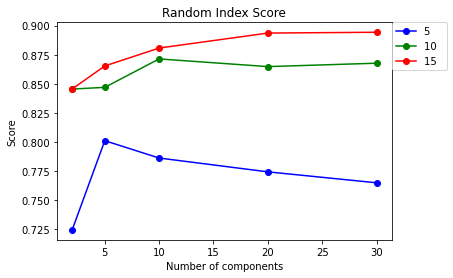

In [8]:
ncut_evaluation.plot_score()

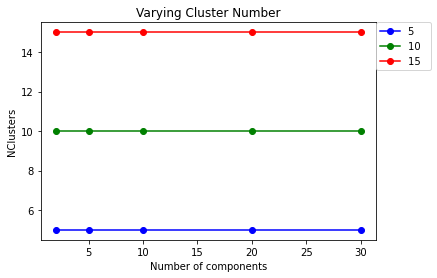

In [9]:
ncut_evaluation.plot_n_clusters()

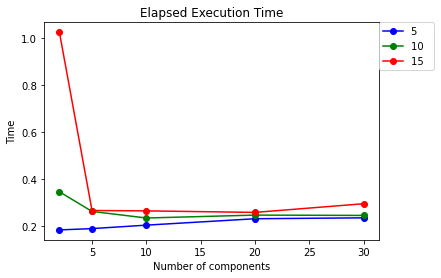

In [10]:
ncut_evaluation.plot_time()

## Best model

In [11]:
best = ncut_evaluation.best_model

In [12]:
best

NormalizedCut[N-rows: 1050; N-components: 30; , Score: 0.8942557537791094, N-clusters: 15] [K: 15] 

In [13]:
clusters = DataClusterSplit(data=data, index=best.out)

In [14]:
clusters

Cluster Data Split [Data: 1050, Clusters: 15, Mean-per-Cluster: 70] 

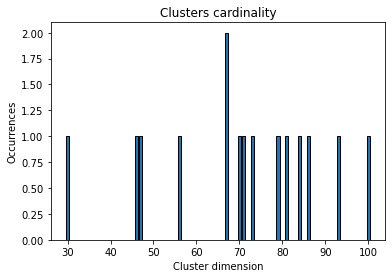

In [15]:
clusters.frequencies_histo()

[Mode 5: {5: 20, 4: 17, 0: 13, 8: 10, 2: 8, 6: 6, 7: 5, 9: 3, 3: 2}] 


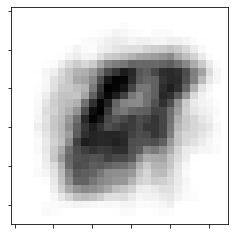

[Mode 6: {6: 51, 0: 7, 5: 7, 8: 2, 3: 2, 9: 1}] 


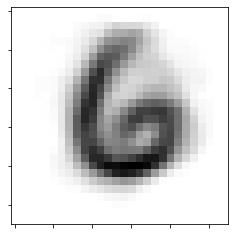

[Mode 7: {7: 42, 9: 3, 3: 1}] 


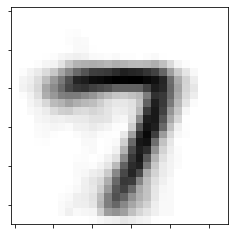

[Mode 0: {0: 47}] 


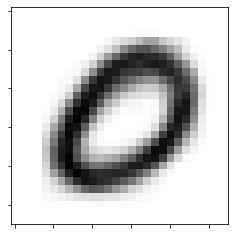

[Mode 0: {0: 30}] 


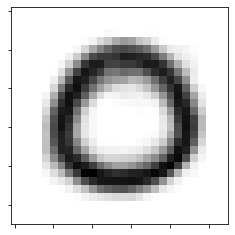

[Mode 3: {3: 35, 5: 19, 8: 7, 2: 4, 0: 2}] 


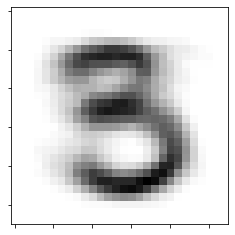

[Mode 9: {9: 25, 7: 24, 4: 22, 8: 2}] 


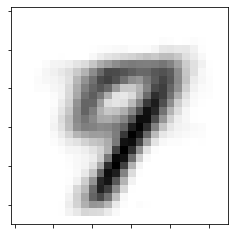

[Mode 6: {6: 38, 5: 18, 0: 7, 2: 2, 8: 1, 1: 1}] 


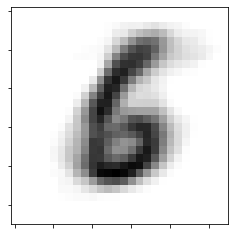

[Mode 9: {9: 43, 4: 36, 7: 5, 5: 5, 8: 3, 3: 1}] 


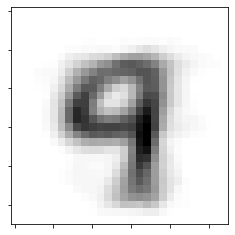

[Mode 1: {1: 70, 2: 5, 3: 2, 8: 1, 7: 1}] 


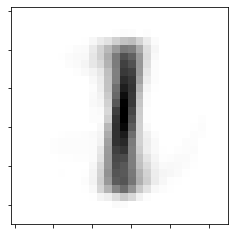

[Mode 2: {2: 38, 7: 25, 9: 17, 4: 10, 3: 3, 1: 3, 0: 2, 8: 2}] 


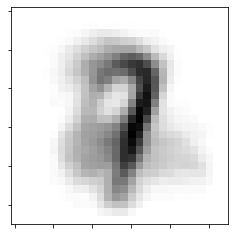

[Mode 2: {2: 51, 8: 7, 3: 7, 0: 5, 5: 1}] 


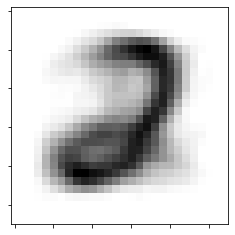

[Mode 8: {8: 62, 5: 16, 2: 3, 0: 2, 3: 2, 9: 1}] 


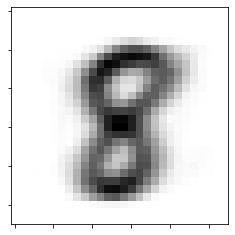

[Mode 1: {1: 43, 7: 5, 4: 3, 9: 3, 2: 2}] 


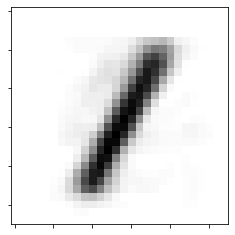

[Mode 3: {3: 55, 5: 17, 9: 4, 8: 2, 6: 1, 0: 1, 2: 1}] 


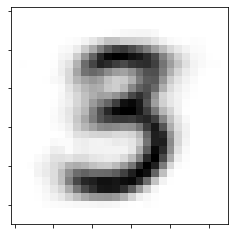

In [16]:
clusters.plot_mean_digit()